In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [68]:
salaries_data = pd.read_csv("data/ds_salaries.csv")
salaries_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000.0,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500.0,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000.0,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,USD,120000,CA,100,CA,M


In [69]:
salaries_data = salaries_data.drop(["salary", "salary_currency"], axis = 1)

In [70]:
duplicates = salaries_data[salaries_data.duplicated()]
duplicates.shape

(1168, 9)

In [71]:
# salaries_data = salaries_data.drop_duplicates()
salaries_data.shape

(3755, 9)

In [72]:
salaries_data.isnull().sum()

work_year             0
experience_level      3
employment_type       3
job_title             5
salary_in_usd         0
employee_residence    1
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [73]:
salaries_data = salaries_data.dropna()
salaries_data.shape

(3743, 9)

In [74]:
salaries_data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [75]:
salaries_data.describe()

,work_year,salary_in_usd,remote_ratio
count,3743.000000,3743.000000,3743.000000
mean,2022.371627,137502.945498,46.286401
std,0.691644,63004.488940,48.586050
min,2020.000000,5132.000000,0.000000
25%,2022.000000,95000.000000,0.000000
50%,2022.000000,135000.000000,0.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


In [76]:
salaries_data.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary_in_usd         1032
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [77]:
salaries_data['work_year'] = salaries_data.work_year.astype("category")
salaries_data['experience_level'] = salaries_data.experience_level.astype("category")
salaries_data['employment_type'] = salaries_data.employment_type.astype("category")
salaries_data['employee_residence'] = salaries_data.employee_residence.astype("category")
salaries_data['company_location'] = salaries_data.company_location.astype("category")
salaries_data['company_size'] = salaries_data.company_size.astype("category")
salaries_data['remote_ratio'] = salaries_data.remote_ratio.astype("category")

salaries_data.dtypes

work_year             category
experience_level      category
employment_type       category
job_title               object
salary_in_usd            int64
employee_residence    category
remote_ratio          category
company_location      category
company_size          category
dtype: object

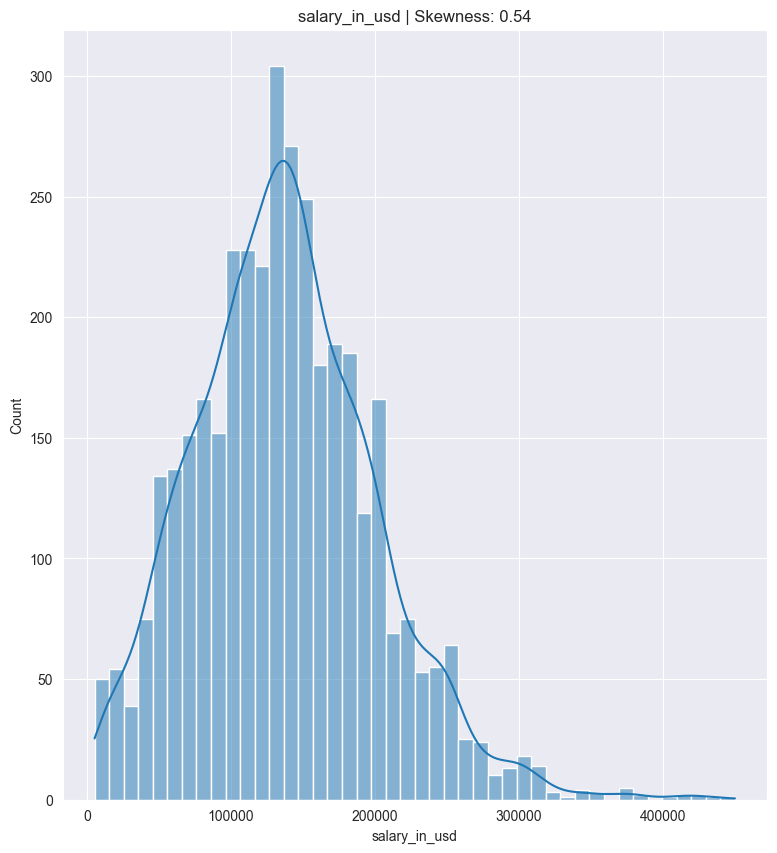

In [78]:
numerical_columns = salaries_data.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(20, 10))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(salaries_data[feature], kde = True)
    plt.title(f"{feature} | Skewness: {round(salaries_data[feature].skew(), 2)}")
    
plt.show()

In [79]:
def visualize_categorical_fields(df, df2):
    categorical_columns = df.select_dtypes(include=["category"]).columns
    
    width = 15
    multiplier = 2
    decrements = [1, 0]
    if df2 is not None:
        width = 30
        multiplier = 4
        decrements = [3, 2, 1, 0]
    
    plt.figure(figsize=(width, 30))
    for idx, feature in enumerate(categorical_columns, 1):
        counts = df[feature].value_counts()
        plt.subplot(len(categorical_columns), multiplier, multiplier*idx-decrements[0])
        plt.bar(counts.index, counts)
        plt.title(f"{feature}")
        
        plt.subplot(len(categorical_columns), multiplier, multiplier*idx-decrements[1])
        sns.boxplot(data=df, x=feature, y='salary_in_usd')
        plt.title(f"salary by {feature}")
        
        if df2 is not None:
            counts = df2[feature].value_counts()
            plt.subplot(len(categorical_columns), multiplier, multiplier*idx-decrements[2])
            plt.bar(counts.index, counts, color="orange")
            plt.title(f"new {feature}")
            
            plt.subplot(len(categorical_columns), multiplier, multiplier*idx-decrements[3])
            sns.boxplot(data=df2, x=feature, y='salary_in_usd', color="orange")
            plt.title(f"new salary by {feature}")

    
    plt.show()

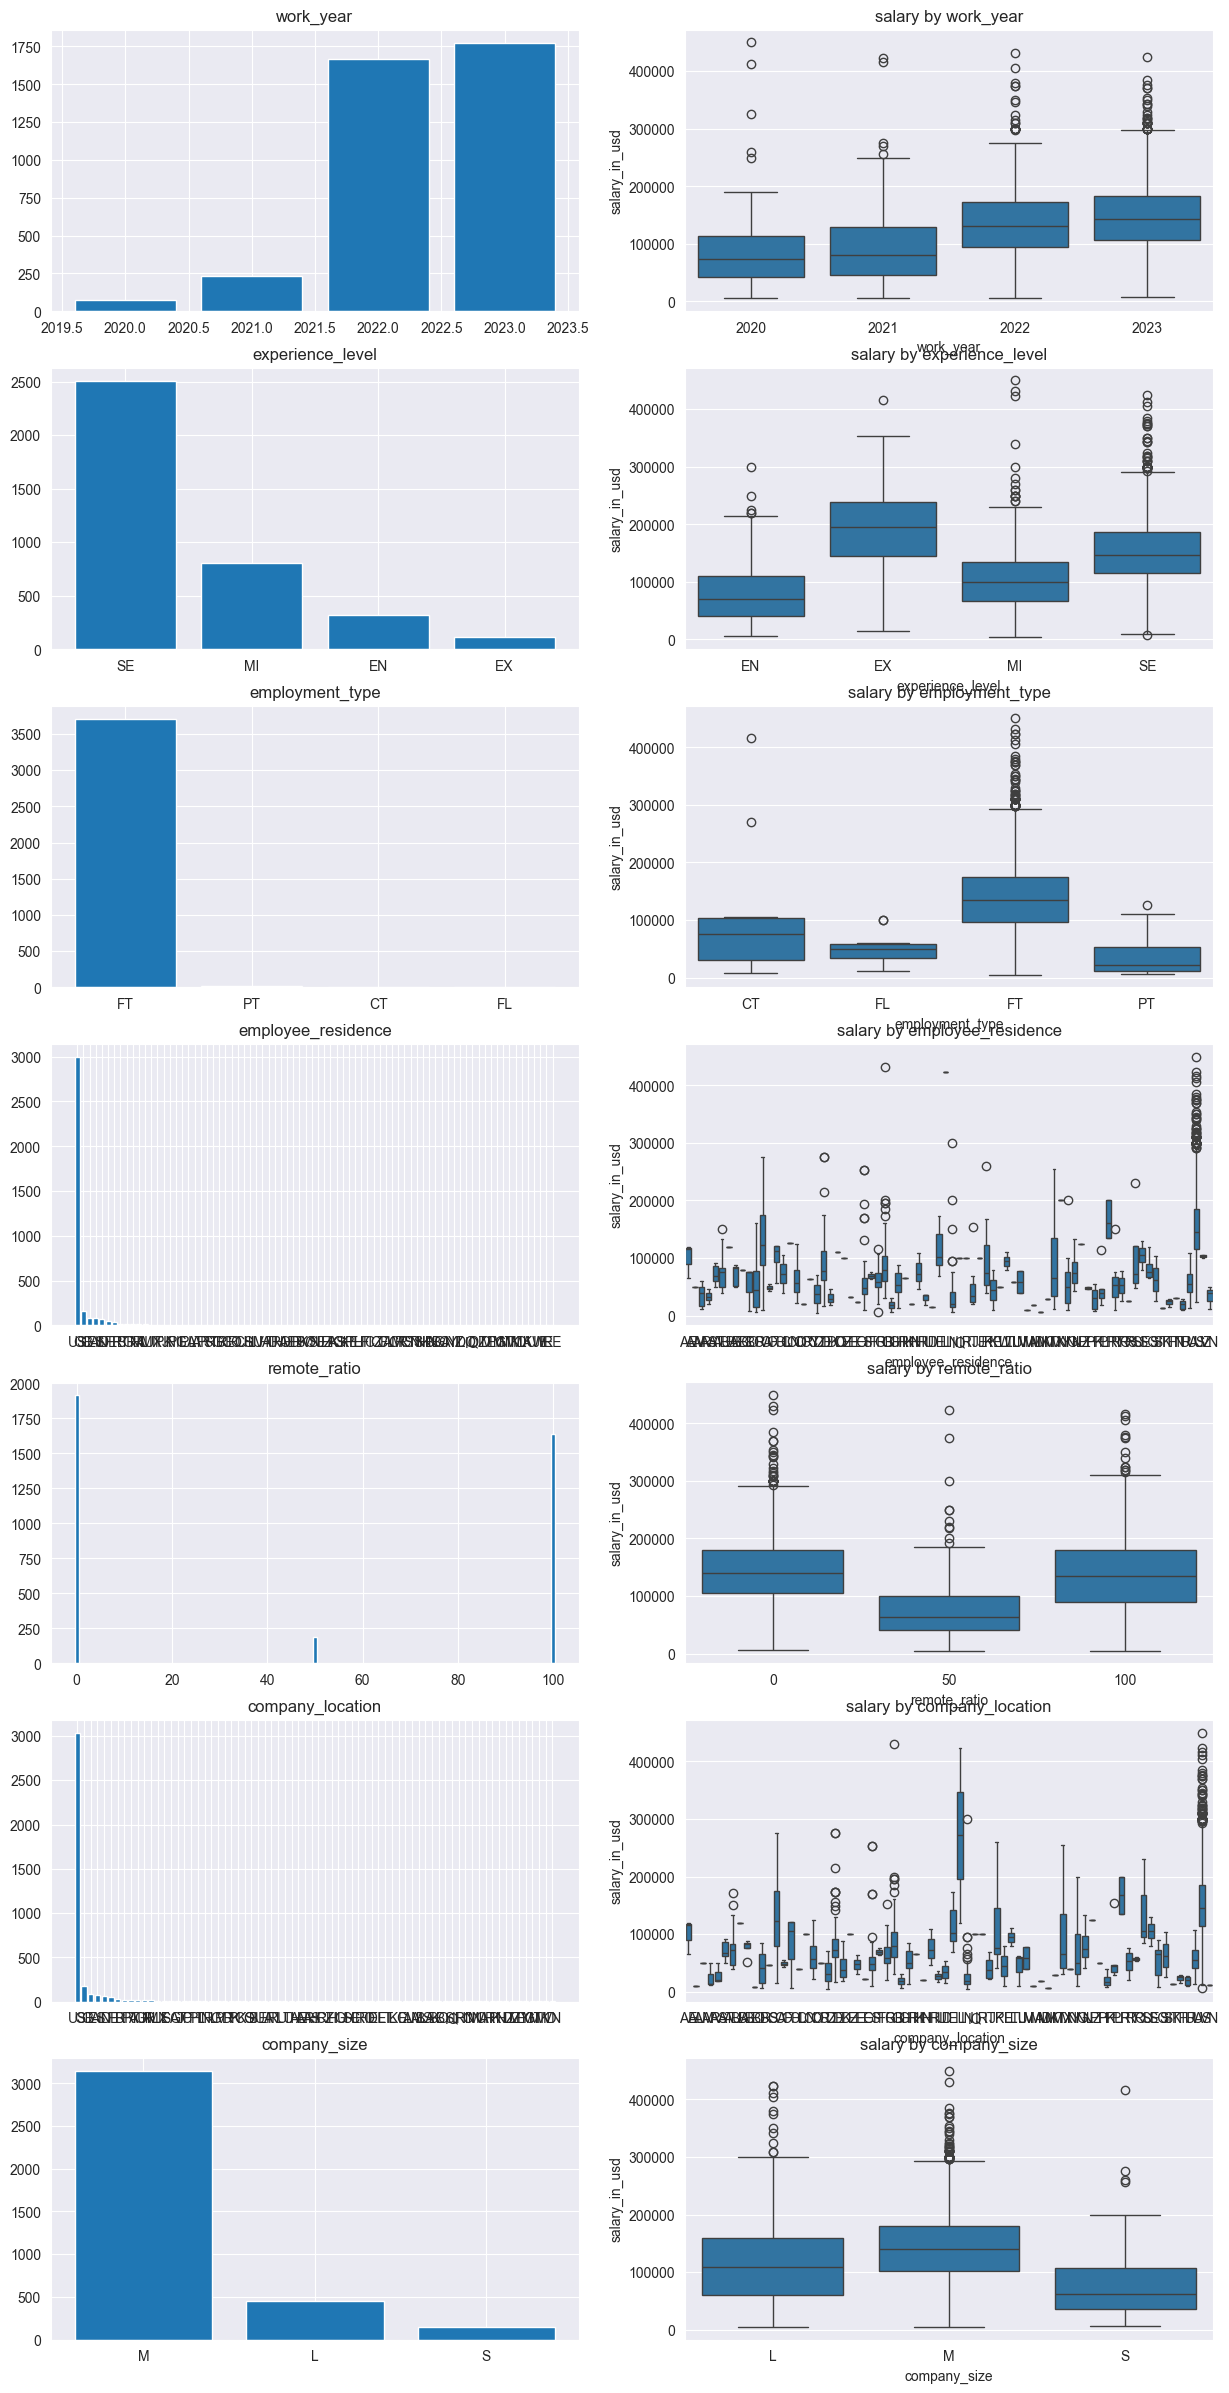

In [80]:
visualize_categorical_fields(salaries_data, None)

In [81]:
from scipy.stats import f_oneway

def anova(df, col):
    values = df[col].unique()
    
    filtered_dfs = []
    for value in values:
        df_filter = df[df[col] == value]["salary_in_usd"]
        filtered_dfs.append(df_filter)
        
    f_statistic, p_value = f_oneway(*filtered_dfs)

    print(f"F-Statistic for {col}:", f_statistic)
    print(f"P-Value fpr {col}:", p_value)
    
    return f_statistic
    

F-Statistic for work_year: 75.76513665820138
P-Value fpr work_year: 1.4285068233055275e-47
F-Statistic for experience_level: 310.0524305401015
P-Value fpr experience_level: 9.193647428931702e-180
F-Statistic for employment_type: 20.853652954686275
P-Value fpr employment_type: 2.141976790942465e-13
F-Statistic for remote_ratio: 99.85752200275613
P-Value fpr remote_ratio: 5.632482460612268e-43
F-Statistic for company_size: 104.31273824478158
P-Value fpr company_size: 8.241043870458901e-45


Text(0.5, 1.0, 'Analysis of Variance')

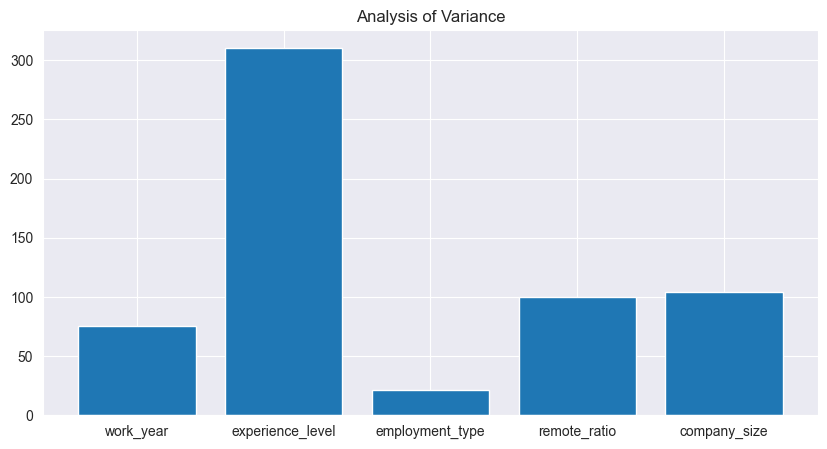

In [82]:
import numpy as np

f_work_year = anova(salaries_data, "work_year")
f_experience_level = anova(salaries_data, "experience_level")
f_employment_type = anova(salaries_data, "employment_type")
f_remote_ratio = anova(salaries_data, "remote_ratio")
f_company_size = anova(salaries_data, "company_size")

plt.figure(figsize=(10, 5))
x = np.array(["work_year", "experience_level", "employment_type", "remote_ratio", "company_size"])
y = np.array([f_work_year, f_experience_level, f_employment_type, f_remote_ratio, f_company_size])
plt.bar(x, y)
plt.title("Analysis of Variance")


In [83]:
from sklearn.utils import resample

def balance_sample(df, col):
    value_counts = df[col].value_counts()
    majority_class_name = value_counts.index[0]
    majority_class_size = value_counts[majority_class_name]
    majority_class = df[df[col] == majority_class_name]
    
    df_upsampled = majority_class
    for current_class_name in value_counts.index:
        if current_class_name == majority_class_name:
            continue
        
        current_class = salaries_data[salaries_data[col] == current_class_name]
        current_class_upsampled = resample(current_class, replace=True, n_samples=majority_class_size)
    
        df_upsampled = pd.concat([df_upsampled, current_class_upsampled])       
        
    return df_upsampled


In [84]:
# work_years_upsampled_salaries_data = balance_sample(salaries_data, "work_year")
# experience_level_upsampled_salaries_data = balance_sample(salaries_data, "experience_level")
# employment_type_upsampled_salaries_data = balance_sample(salaries_data, "employment_type")
# remote_ratio_upsampled_salaries_data = balance_sample(salaries_data, "remote_ratio")
# company_size_upsampled_salaries_data = balance_sample(salaries_data, "company_size")
# # 
# upsampled_salaries_data = pd.concat([work_years_upsampled_salaries_data, experience_level_upsampled_salaries_data, employment_type_upsampled_salaries_data, remote_ratio_upsampled_salaries_data, company_size_upsampled_salaries_data])      

In [85]:
# visualize_categorical_fields(salaries_data, upsampled_salaries_data)

In [86]:
# salaries_data = upsampled_salaries_data

In [87]:
gdp_per_capita = pd.read_csv("data/gdp_per_capita.csv")
gdp_per_capita = gdp_per_capita[pd.to_numeric(gdp_per_capita['2020'], errors='coerce').notnull()]
gdp_per_capita = gdp_per_capita[pd.to_numeric(gdp_per_capita['2021'], errors='coerce').notnull()]
gdp_per_capita = gdp_per_capita[pd.to_numeric(gdp_per_capita['2022'], errors='coerce').notnull()]
gdp_per_capita = gdp_per_capita[pd.to_numeric(gdp_per_capita['2023'], errors='coerce').notnull()]
gdp_per_capita = gdp_per_capita[pd.to_numeric(gdp_per_capita['2024'], errors='coerce').notnull()]
gdp_per_capita.head()

,Country,Code,2020,2021,2022,2023,2024
3,Luxembourg,LU,117616.151,134924.978,126597.939,129810.315,135321.424
4,Switzerland,CH,86138.871,93966.493,94798.83,101510.023,106097.643
5,Ireland,IE,86313.772,103775.442,104728.5,103465.935,103500.385
6,Norway,NO,68275.277,92955.206,108438.547,87702.851,90433.666
7,Singapore,SG,61466.819,79601.393,88428.724,84734.277,89369.715


In [88]:
gdp_per_capita['2020'] = gdp_per_capita["2020"].astype("float64")
gdp_per_capita['2021'] = gdp_per_capita["2021"].astype("float64")
gdp_per_capita['2022'] = gdp_per_capita["2022"].astype("float64")
gdp_per_capita['2023'] = gdp_per_capita["2023"].astype("float64")
gdp_per_capita['2024'] = gdp_per_capita["2024"].astype("float64")

gdp_per_capita.dtypes


Country     object
Code        object
2020       float64
2021       float64
2022       float64
2023       float64
2024       float64
dtype: object

In [89]:
for index, row in salaries_data.iterrows():
    residence_country = row["employee_residence"]
    company_country = row["company_location"]
    year = str(row["work_year"])
    
    residence_gdp_per_capita = gdp_per_capita[gdp_per_capita["Code"] == residence_country]
    company_gdp_per_capita = gdp_per_capita[gdp_per_capita["Code"] == company_country]
    
    salaries_data.loc[index, "residence_gdp_per_capita"] = residence_gdp_per_capita[year].mean(numeric_only=True)
    salaries_data.loc[index, "company_gdp_per_capita"] = company_gdp_per_capita[year].mean(numeric_only=True)

salaries_data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,residence_gdp_per_capita,company_gdp_per_capita
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L,33895.593,33895.593
1,2023,MI,CT,ML Engineer,30000,US,100,US,S,82715.100,82715.100
2,2023,MI,CT,ML Engineer,25500,US,100,US,S,82715.100,82715.100
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M,53607.403,53607.403
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M,53607.403,53607.403


In [90]:
salaries_data = salaries_data.drop("employee_residence", axis=1)
salaries_data = salaries_data.drop("company_location", axis=1)

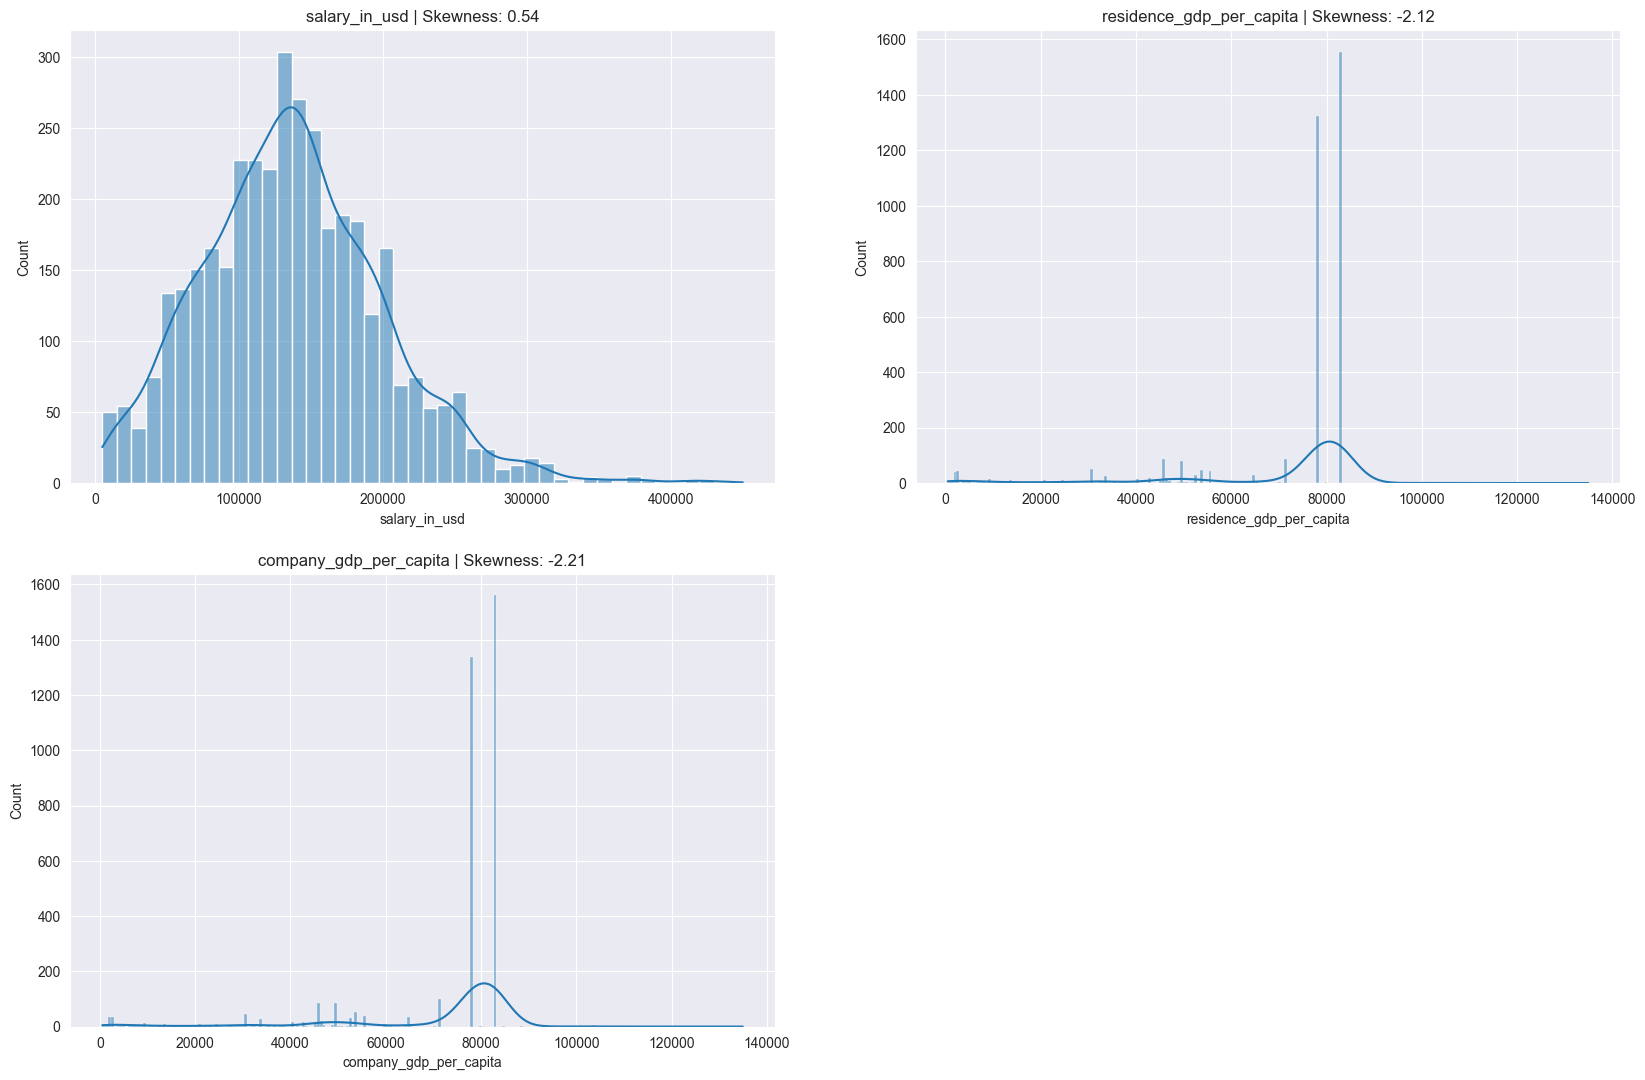

In [91]:
numerical_columns = salaries_data.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(20, 20))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(salaries_data[feature], kde = True)
    plt.title(f"{feature} | Skewness: {round(salaries_data[feature].skew(), 2)}")
    
plt.show()

,salary_in_usd,residence_gdp_per_capita,company_gdp_per_capita
salary_in_usd,1.000000,0.498071,0.478054
residence_gdp_per_capita,0.498071,1.000000,0.919419
company_gdp_per_capita,0.478054,0.919419,1.000000


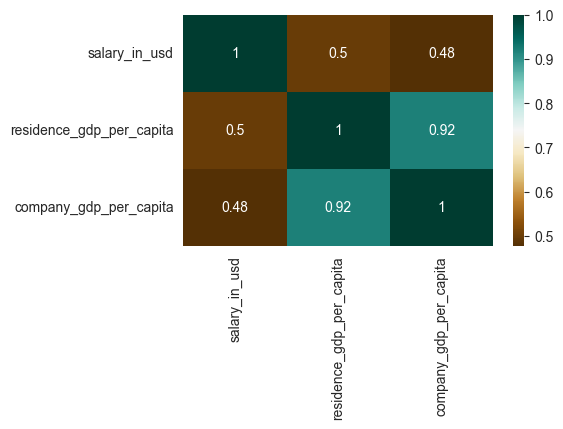

In [92]:
numerical_data = salaries_data.select_dtypes(include=["int64", "float64"])

plt.figure(figsize = (5,3))
c= numerical_data.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
c


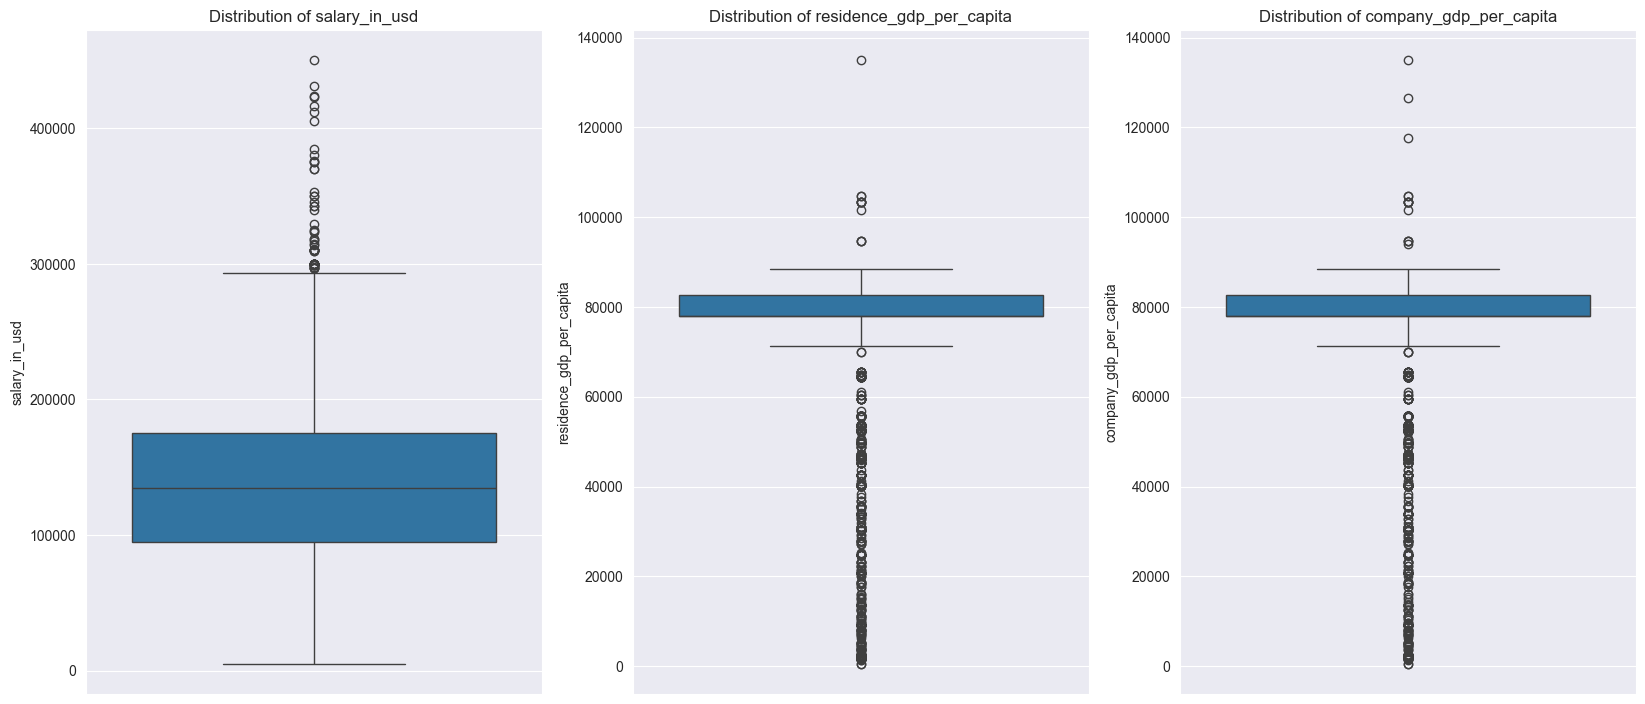

In [93]:
categorical_columns = salaries_data.select_dtypes(include=["category"]).columns

plt.figure(figsize=(20, 50))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(categorical_columns), 3, idx)
    sns.boxplot(salaries_data[feature])
    plt.title(f"Distribution of {feature}")

Text(0.5, 1.0, 'Salary by Company GDP per capita')

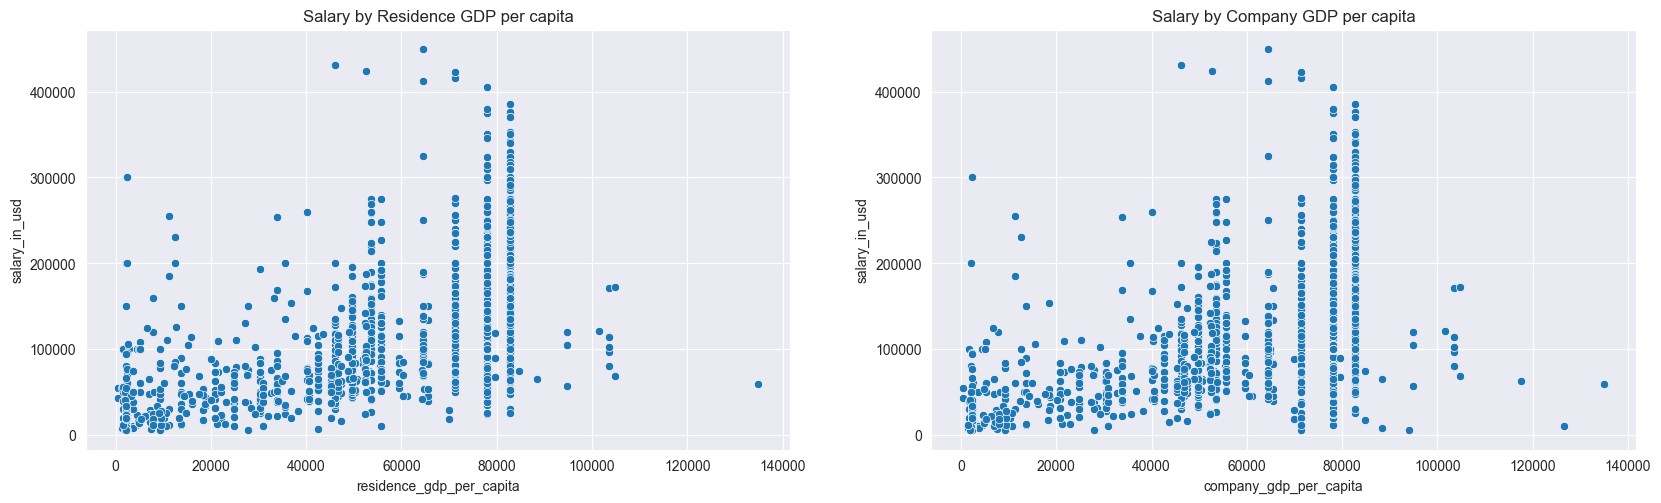

In [94]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(data=salaries_data, x="residence_gdp_per_capita", y="salary_in_usd")
plt.title("Salary by Residence GDP per capita")

plt.subplot(2, 2, 2)
sns.scatterplot(data=salaries_data, x="company_gdp_per_capita", y="salary_in_usd")
plt.title("Salary by Company GDP per capita")

In [95]:
iso_forest = IsolationForest(contamination=0.01)
iso_forest.fit(numerical_data)

outliers = iso_forest.predict(numerical_data)

In [96]:
# numerical_data["outlier"] = outliers == -1
# numerical_data[numerical_data["outlier"]].shape

Text(0.5, 1.0, 'Salary by Company GDP per capita')

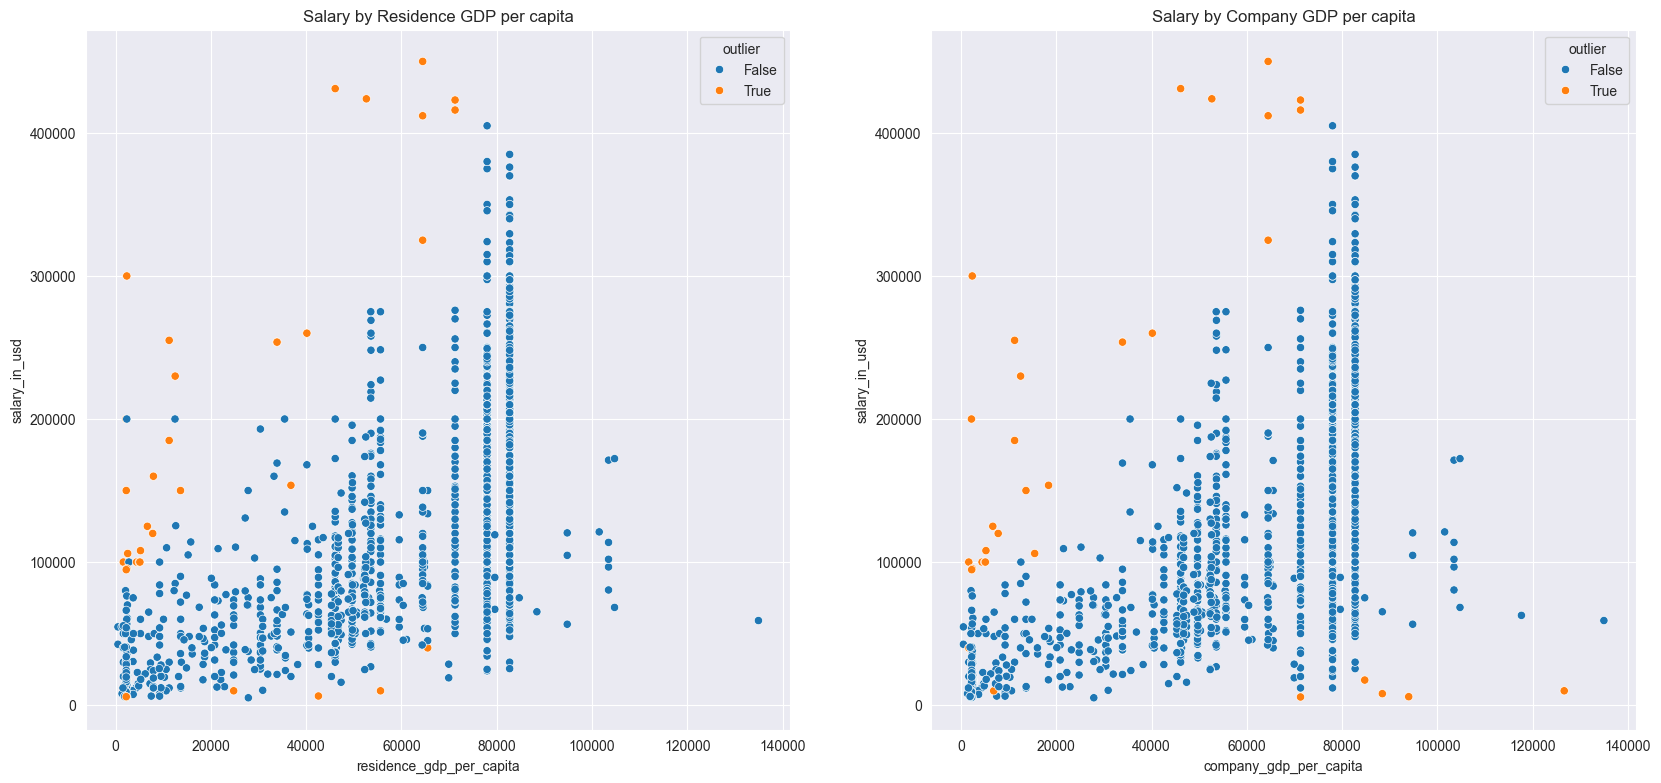

In [97]:
numerical_data["outlier"] = outliers == -1

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.scatterplot(data=numerical_data, x="residence_gdp_per_capita", y="salary_in_usd", hue="outlier")
plt.title("Salary by Residence GDP per capita")

plt.subplot(2, 2, 2)
sns.scatterplot(data=numerical_data, x="company_gdp_per_capita", y="salary_in_usd", hue="outlier")
plt.title("Salary by Company GDP per capita")



In [98]:
salaries_data.shape

(3743, 9)

In [99]:
salaries_data = salaries_data[numerical_data["outlier"] == False]
salaries_data.shape

(3705, 9)

In [100]:
salaries_data = salaries_data.groupby(["work_year", "experience_level", "employment_type", "job_title", "remote_ratio", "residence_gdp_per_capita", "company_gdp_per_capita", "company_size"], observed=True)
salaries_data = salaries_data["salary_in_usd"].mean()
salaries_data = salaries_data.reset_index()
salaries_data.shape

(812, 9)

In [101]:
salaries_data.to_csv("data/ds_salaries_cleaned.csv", index=False)